---

<h1><center>Using SVD for Image Compression </center></h1>

---

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pickle

The next cell will load the image `X` from a file and plot it using `plt.imshow`. 

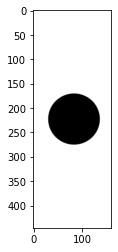

In [2]:
# Load the data from a pickle file
with open('SVD.pickle', 'rb') as file:
    X = pickle.load(file)   
    
# Display the data matrix as an image
plt.imshow(X,cmap='gray')

# 1) Data dimensions

Record the number of rows and columns of `X` in variables `N` and `D` respectively.

In [4]:
N = X.shape[0]
D = X.shape[1]

# 2) Run SVD
This has already be done for you. We are using the implementation of SVD from scipy's `linalg` package. Look at the documentation for `linalg.svd` (eg run `linalg.svd?`) to understand the syntax.

In [3]:
from scipy import linalg
U, s, Vt = linalg.svd(X)
U.shape, s.shape, Vt.shape

((446, 446), (160,), (160, 160))

# 3) Matrix rank
Compute the rank of X using `np.linalg.matrix_rank`. Record it to the variable `rank`.

In [4]:
rank = np.linalg.matrix_rank(X)

# 4) Plot the singular values
Use `plt.semilogy` to plot the sequence of singular values.

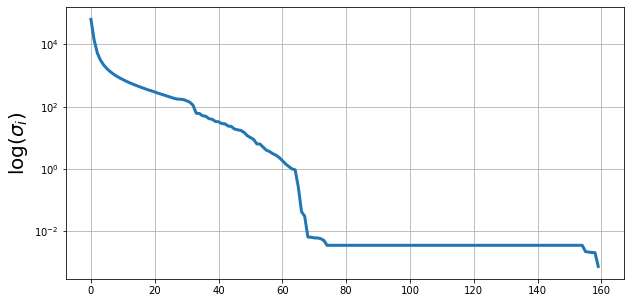

In [5]:
fig4 = plt.figure(figsize=(10,5))
plt.semilogy(s, linewidth = 3)
plt.ylabel(r'log(${\sigma_i}$)', fontsize = 20)
plt.grid()

# 5) Plot first 20 columns of $U \Sigma$ using `plt.imshow`

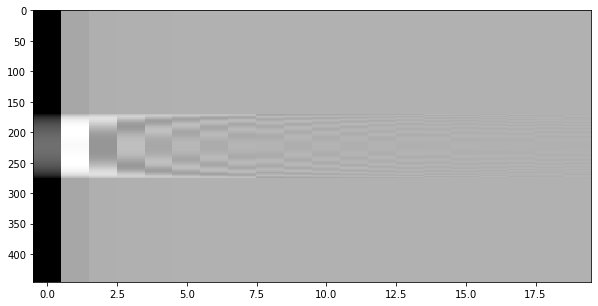

In [6]:
Sigma = np.concatenate([np.diag(s), np.zeros((U.shape[0] - s.shape[0], s.shape[0]))])
U_Sigma = U @ Sigma

fig5 = plt.figure(figsize=(10,5))
r = 20

plt.imshow(U_Sigma[:, :r], cmap = 'gray', aspect = 'auto', interpolation = 'None')

plt.show()

# 6) Plot first 20 rows of $\Sigma V^T$ using `plt.imshow`

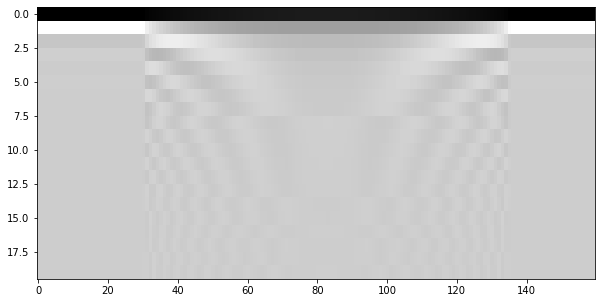

In [7]:
Sigma_Vt = Sigma @ Vt

fig6 = plt.figure(figsize=(10,5))
r =20

plt.imshow(Sigma_Vt[:r, :], cmap = 'gray', aspect = 'auto', interpolation = 'None')

plt.show()

# 7) Plot the compressed images for r=2, r=5, r=50

Plot each one with `ax[i].imshow` with `i` varying from 0 to 2, so that the images appear in a row.


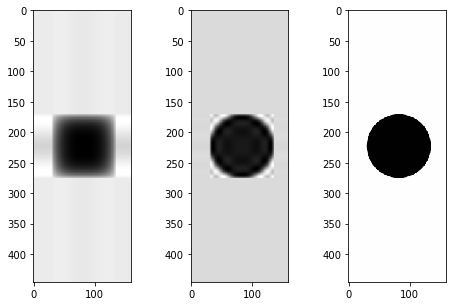

In [8]:
fig7, ax = plt.subplots(figsize=(8,5),nrows=1,ncols=3)
r = [2, 5, 50]

for i in range(len(r)):
    ax[i].imshow((U[:, :r[i]]) @ (Sigma[:r[i], :r[i]]) @ (Vt[:r[i], :]), cmap = 'gray', aspect = 1, interpolation = 'None')
    
plt.show()

# 8) Plot the percent information retained (sum of singular values) vs $r$

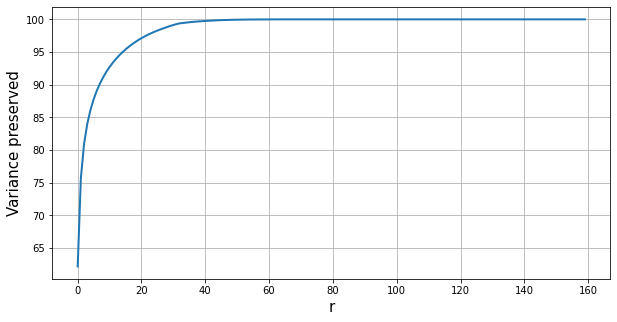

In [9]:
fig8 = plt.figure(figsize=(10,5))

r = np.arange(s.shape[0])

info_pct = np.cumsum(s) / np.sum(s)
    
plt.plot(r, info_pct * 100, linewidth = 2)
plt.xlabel('r', fontsize = 15)
plt.ylabel('Variance preserved', fontsize = 15)
plt.grid()
plt.show()

# 9) How many columns should be kept to preserve 90% of the  variance?

In [10]:
cols90 = next(idx for idx, pct in enumerate(info_pct) if pct >= 0.9) + 1